In [1]:
from IPython import display

In [2]:
try:
    import nbformat
except:
    !pip install nbformat
display.clear_output()

+ action: train_feat03
+ feat_path: ../../exps/featbase_23102025/data.npz
+ seed: 42
+ exp_dir: d:\dai_hoc\nam3\HK5\ML\LAB_GROUP\Challeng_1_Titanic_Final\process\exps
+ exp_name: trainbase_23102025
+ data_dir: d:\dai_hoc\nam3\HK5\ML\LAB_GROUP\Challeng_1_Titanic_Final\data
+ verbose: True
+ save_dir: d:\dai_hoc\nam3\HK5\ML\LAB_GROUP\Challeng_1_Titanic_Final\process\exps\trainbase_23102025
---------- information ----------
train-col: {'Pclass', 'Parch', 'Cabin', 'Age', 'Sex', 'Ticket', 'Embarked', 'PassengerId', 'Name', 'Survived', 'SibSp', 'Fare'}
test-col: {'Pclass', 'Parch', 'Cabin', 'Age', 'Sex', 'Ticket', 'Embarked', 'PassengerId', 'Name', 'SibSp', 'Fare'}
Union: {'Pclass', 'Parch', 'Cabin', 'Age', 'Sex', 'Ticket', 'Embarked', 'PassengerId', 'Name', 'SibSp', 'Fare'}
Difference: {'Survived'}


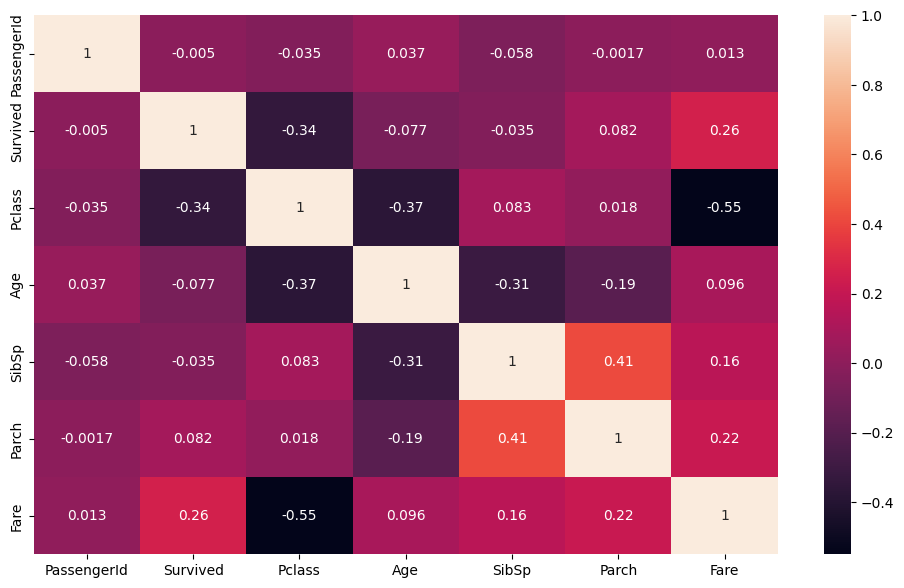

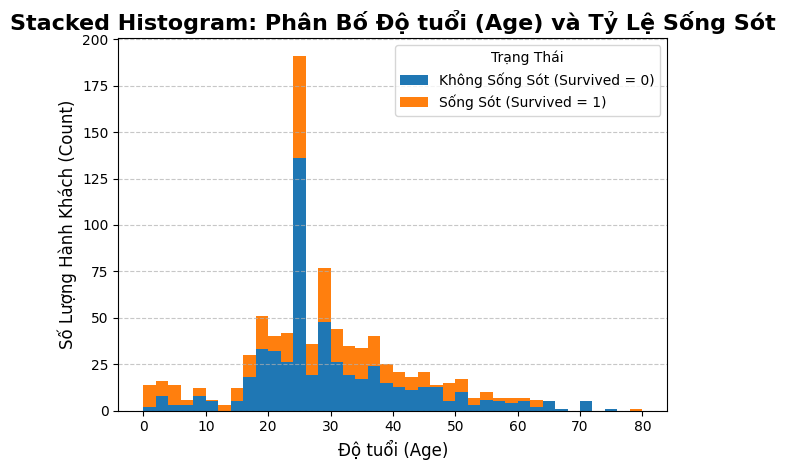

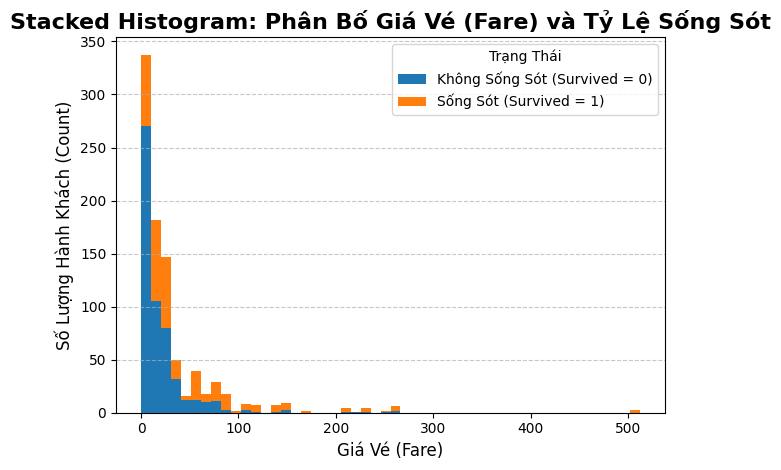

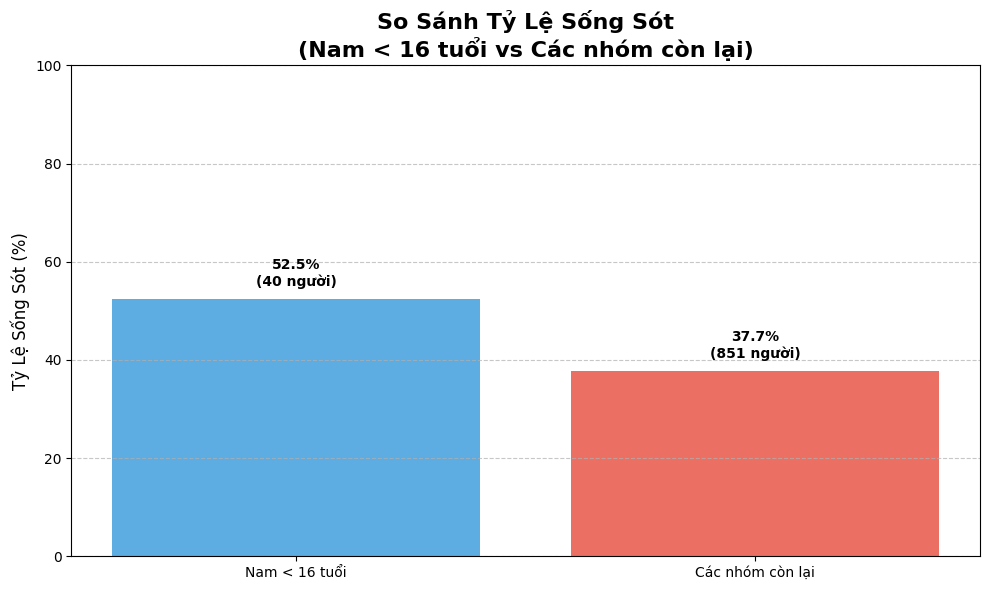

Tỷ lệ sống sót Nam < 16 tuổi: 52.50%
Tỷ lệ sống sót các nhóm còn lại: 37.72%


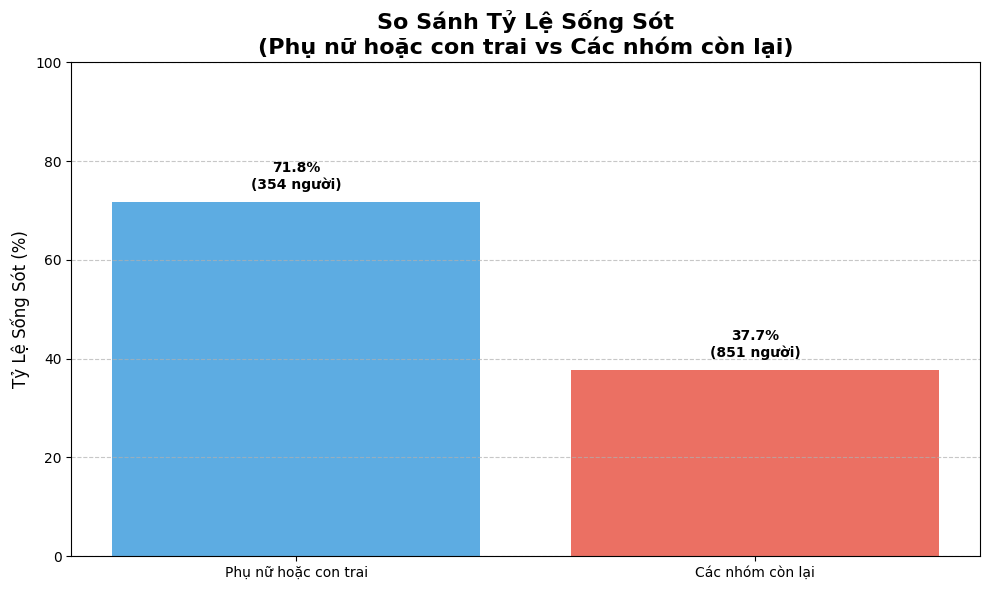

Tỷ lệ sống sót Phụ nữ hoặc con trai: 71.75%
Tỷ lệ sống sót các nhóm còn lại: 37.72%


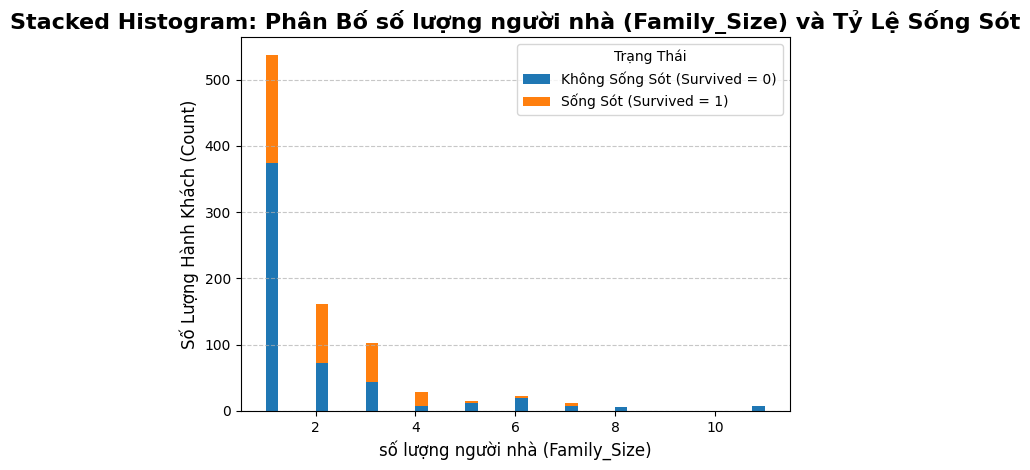

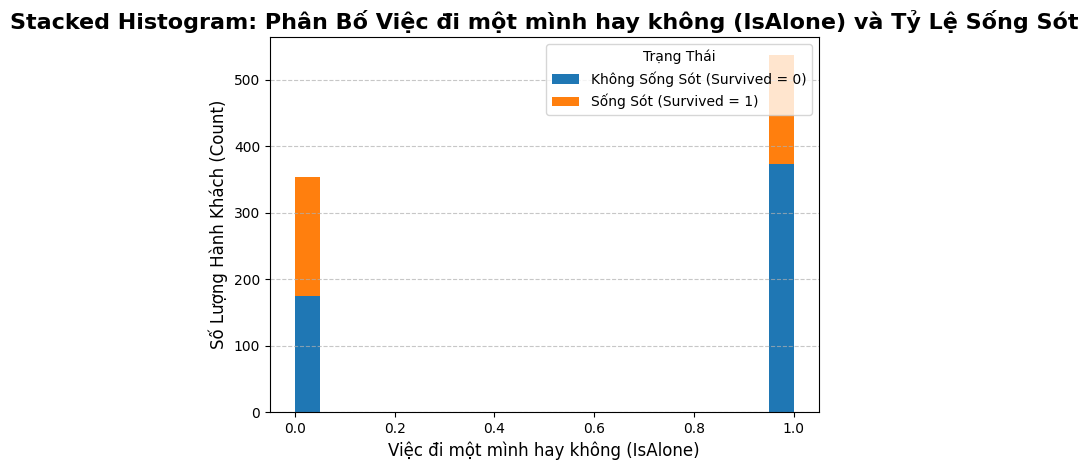

Runing ... [train_feat03]
Đã lưu DataFrame với đầy đủ thông tin cột


In [3]:
%run ../model/train.ipynb

In [4]:
!jupyter nbconvert  ../model/train.ipynb --to html 

[NbConvertApp] Converting notebook ../model/train.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 827335 bytes to ..\model\train.html


# Import lib


In [5]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve
import joblib

data = np.load("../../exps/trainbase_23102025/data.npz", allow_pickle=True)

In [6]:
with np.load('../../exps/trainbase_23102025/data.npz') as z:
    print(z.files)          # shows the list of keys present

['train_data', 'test_data', 'train_columns', 'test_columns']


In [7]:
data['train_columns']

array(['Sex', 'Pclass', 'PassengerId', 'Boy', 'WomanOrBoy', 'Family_Size',
       'IsAlone', 'Family_Survival', 'Name_2', 'Name_3', 'Name_4',
       'Name_5', 'Name_6', 'Fare_2', 'Fare_3', 'Fare_4', 'Age_1', 'Age_2',
       'Age_3', 'Age_4', 'Age_5', 'Output'], dtype=object)

In [8]:
# Lấy dữ liệu train và test
df_train = pd.DataFrame(data = data['train_data'], columns= data['train_columns'])
df_test = pd.DataFrame(data['test_data'], columns=df_train.drop(columns=['Output']).columns)


In [9]:
df_train

,Sex,Pclass,PassengerId,Boy,WomanOrBoy,Family_Size,IsAlone,Family_Survival,Name_2,Name_3,...,Name_6,Fare_2,Fare_3,Fare_4,Age_1,Age_2,Age_3,Age_4,Age_5,Output
0,1.0,3.0,1.0,0.0,0.0,2.0,0.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,2.0,0.0,1.0,2.0,0.0,0.5,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,3.0,3.0,0.0,1.0,1.0,1.0,0.5,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,4.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,3.0,5.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,2.0,887.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
887,0.0,1.0,888.0,0.0,1.0,1.0,1.0,0.5,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
888,0.0,3.0,889.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
889,1.0,1.0,890.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [10]:
df_test

,Sex,Pclass,PassengerId,Boy,WomanOrBoy,Family_Size,IsAlone,Family_Survival,Name_2,Name_3,...,Name_5,Name_6,Fare_2,Fare_3,Fare_4,Age_1,Age_2,Age_3,Age_4,Age_5
0,1.0,3.0,892.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,3.0,893.0,0.0,1.0,2.0,0.0,0.5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,2.0,894.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,3.0,895.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,3.0,896.0,0.0,1.0,3.0,0.0,0.5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,3.0,1305.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
414,0.0,1.0,1306.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
415,1.0,3.0,1307.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
416,1.0,3.0,1308.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
X_train = df_train.drop(columns=['Output', 'PassengerId'], axis=1)
y_train = df_train['Output']

In [12]:
X_test = df_test.drop(columns=['PassengerId'], axis=1)

# Logistic Regression


In [13]:
# Tạo pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

# Thiết lập hyperparameters
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']
}

# Sử dụng Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search với multiple scoring metrics
grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=cv, 
    scoring={'accuracy': 'accuracy', 'f1': 'f1', 'roc_auc': 'roc_auc'},
    refit='accuracy',  # Chọn metric để chọn best model
    n_jobs=-1,
    verbose=1
)

# Train model
print("\nBắt đầu training với GridSearch...")
grid_search.fit(X_train, y_train)

# Kết quả
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

# Lấy tất cả kết quả cross-validation
cv_results = grid_search.cv_results_
print("\nCross-validation results:")
for i in range(len(cv_results['params'])):
    print(f"Params: {cv_results['params'][i]}")
    print(f"  Accuracy: {cv_results['mean_test_accuracy'][i]:.4f} (+/- {cv_results['std_test_accuracy'][i]:.4f})")
    print(f"  F1: {cv_results['mean_test_f1'][i]:.4f} (+/- {cv_results['std_test_f1'][i]:.4f})")
    print(f"  ROC AUC: {cv_results['mean_test_roc_auc'][i]:.4f} (+/- {cv_results['std_test_roc_auc'][i]:.4f})")


Bắt đầu training với GridSearch...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best parameters: {'logreg__C': 10, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Best cross-validation accuracy: 0.8619

Cross-validation results:
Params: {'logreg__C': 0.01, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
  Accuracy: 0.8406 (+/- 0.0150)
  F1: 0.7987 (+/- 0.0202)
  ROC AUC: 0.8800 (+/- 0.0146)
Params: {'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
  Accuracy: 0.8574 (+/- 0.0204)
  F1: 0.8084 (+/- 0.0303)
  ROC AUC: 0.8980 (+/- 0.0171)
Params: {'logreg__C': 0.1, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
  Accuracy: 0.8552 (+/- 0.0157)
  F1: 0.8060 (+/- 0.0245)
  ROC AUC: 0.9102 (+/- 0.0169)
Params: {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
  Accuracy: 0.8597 (+/- 0.0179)
  F1: 0.8084 (+/- 0.0243)
  ROC AUC: 0.9104 (+/- 0.0154)
Params: {'logreg__C': 1, 'logreg__penalty': 'l1', 'logr

In [14]:
# Model tốt nhất
best_model_lr = grid_search.best_estimator_

# Đánh giá trên training set
y_pred_train = best_model_lr.predict(X_train)
y_pred_proba_train = best_model_lr.predict_proba(X_train)[:, 1]  # Xác suất lớp 1

# Tính các metrics
train_accuracy = best_model_lr.score(X_train, y_train)
train_f1 = f1_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train)

print(f"\n=== KẾT QUẢ TRÊN TRAINING SET ===")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {train_roc_auc:.4f}")

# print("\nClassification Report:")
# print(classification_report(y_train, y_pred_train))


=== KẾT QUẢ TRÊN TRAINING SET ===
Accuracy: 0.8698
F1 Score: 0.8226
ROC AUC: 0.9208


## Dump mô hình logistic regression


In [15]:
import joblib

# Lưu model
joblib.dump(best_model_lr, '../../exps/trainbase_23102025/logistic_regression_model.pkl')
print("Model đã được lưu bằng joblib")

# Tham số
feature_names = X_train.columns.tolist()
scaler = best_model_lr.named_steps['scaler']

# Lưu nhiều objects cùng lúc
joblib.dump({
    'model': best_model_lr,
    'feature_names': feature_names,  # Nếu có
    'scaler': scaler,  # Nếu có
    'training_date': '2025-10-23'
}, '../../exps/trainbase_23102025/model_package.pkl')

# Load lại model
loaded_model = joblib.load('../../exps/trainbase_23102025/logistic_regression_model.pkl')

Model đã được lưu bằng joblib


# Random forest


In [16]:
# Tạo pipeline cho Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # Vẫn có thể chuẩn hóa cho RF (không bắt buộc)
    ('rf', RandomForestClassifier(random_state=42))
])

# Thiết lập hyperparameters cho Random Forest
param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],           # Số cây trong rừng
    'rf__max_depth': [3, 5, 7, None],             # Độ sâu tối đa của cây
    'rf__min_samples_split': [2, 5, 10],          # Số mẫu tối thiểu để split
    'rf__min_samples_leaf': [1, 2, 4],            # Số mẫu tối thiểu ở lá
    'rf__max_features': ['sqrt', 'log2', None]    # Số features xét tại mỗi split
}

# Sử dụng Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search với multiple scoring metrics
grid_search_rf = GridSearchCV(
    pipeline_rf, 
    param_grid_rf, 
    cv=cv, 
    scoring={'accuracy': 'accuracy', 'f1': 'f1', 'roc_auc': 'roc_auc'},
    refit='accuracy',  # Chọn metric để chọn best model
    n_jobs=-1,
    verbose=1
)

# Train model
print("\nBắt đầu training Random Forest với GridSearch...")
grid_search_rf.fit(X_train, y_train)

# Kết quả
print("\nBest parameters:", grid_search_rf.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search_rf.best_score_))

# Lấy tất cả kết quả cross-validation
cv_results = grid_search_rf.cv_results_
print("\nCross-validation results (top 5 combinations):")
# Chỉ hiển thị 5 combination tốt nhất
best_indices = np.argsort(cv_results['mean_test_accuracy'])[-5:][::-1]

for i in best_indices:
    print(f"\nParams: {cv_results['params'][i]}")
    print(f"  Accuracy: {cv_results['mean_test_accuracy'][i]:.4f} (+/- {cv_results['std_test_accuracy'][i]:.4f})")
    print(f"  F1: {cv_results['mean_test_f1'][i]:.4f} (+/- {cv_results['std_test_f1'][i]:.4f})")
    print(f"  ROC AUC: {cv_results['mean_test_roc_auc'][i]:.4f} (+/- {cv_results['std_test_roc_auc'][i]:.4f})")

# Model tốt nhất
best_model_rf = grid_search_rf.best_estimator_

# Đánh giá trên training set
y_pred_train = best_model_rf.predict(X_train)
y_pred_proba_train = best_model_rf.predict_proba(X_train)[:, 1]  # Xác suất lớp 1

# Tính các metrics
train_accuracy = best_model_rf.score(X_train, y_train)
train_f1 = f1_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train)


Bắt đầu training Random Forest với GridSearch...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Best parameters: {'rf__max_depth': 5, 'rf__max_features': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Best cross-validation accuracy: 0.8664

Cross-validation results (top 5 combinations):

Params: {'rf__max_depth': 5, 'rf__max_features': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
  Accuracy: 0.8664 (+/- 0.0175)
  F1: 0.8129 (+/- 0.0259)
  ROC AUC: 0.9141 (+/- 0.0142)

Params: {'rf__max_depth': 5, 'rf__max_features': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
  Accuracy: 0.8664 (+/- 0.0175)
  F1: 0.8129 (+/- 0.0259)
  ROC AUC: 0.9141 (+/- 0.0142)

Params: {'rf__max_depth': 5, 'rf__max_features': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
  Accuracy: 0.8664 (+/- 0.0172)
  F1: 0.8140 (+/- 0.0261)
  ROC AUC:

In [17]:
print(f"\n=== KẾT QUẢ TRÊN TRAINING SET ===")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {train_roc_auc:.4f}")

# print("\nClassification Report:")
# print(classification_report(y_train, y_pred_train))


=== KẾT QUẢ TRÊN TRAINING SET ===
Accuracy: 0.8687
F1 Score: 0.8157
ROC AUC: 0.9335


# Dump mô hình Random Forest


In [18]:
import joblib

# Lưu model
joblib.dump(best_model_rf, '../../exps/trainbase_23102025/random_forest_model.pkl')
print("Model đã được lưu bằng joblib")

# Tham số
feature_names = X_train.columns.tolist()
scaler = best_model_rf.named_steps['scaler']

# Lưu nhiều objects cùng lúc
joblib.dump({
    'model': best_model_rf,
    'feature_names': feature_names,  # Nếu có
    'scaler': scaler,  # Nếu có
    'training_date': '2025-10-23'
}, '../../exps/trainbase_23102025/model_package.pkl')

# Load lại model
loaded_model = joblib.load('../../exps/trainbase_23102025/random_forest_model.pkl')

Model đã được lưu bằng joblib


# XGBoost


In [19]:
# Tạo pipeline cho XGBoost
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),  # XGBoost thường không cần scaling nhưng vẫn có thể dùng
    ('xgb', XGBClassifier(random_state=42, eval_metric='logloss'))
])

# Thiết lập hyperparameters cho XGBoost
param_grid_xgb = {
    'xgb__n_estimators': [50, 100, 200],           # Số cây (boosting rounds)
    'xgb__max_depth': [3, 5, 7],                   # Độ sâu tối đa của cây
    'xgb__learning_rate': [0.01, 0.1, 0.2],       # Tốc độ học
    'xgb__subsample': [0.8, 0.9, 1.0],            # Tỷ lệ mẫu cho mỗi cây
    'xgb__colsample_bytree': [0.8, 0.9, 1.0],     # Tỷ lệ features cho mỗi cây
    'xgb__reg_alpha': [0, 0.1, 1],                # L1 regularization
    'xgb__reg_lambda': [1, 10, 100]               # L2 regularization
}

# Sử dụng Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search với multiple scoring metrics
grid_search_xgb = GridSearchCV(
    pipeline_xgb, 
    param_grid_xgb, 
    cv=cv, 
    scoring={'accuracy': 'accuracy', 'f1': 'f1', 'roc_auc': 'roc_auc'},
    refit='accuracy',  # Chọn metric để chọn best model
    n_jobs=-1,
    verbose=1
)

# Train model
print("\nBắt đầu training XGBoost với GridSearch...")
grid_search_xgb.fit(X_train, y_train)

# Kết quả
print("\nBest parameters:", grid_search_xgb.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search_xgb.best_score_))

# Lấy tất cả kết quả cross-validation
cv_results = grid_search_xgb.cv_results_
print("\nCross-validation results (top 5 combinations):")
# Chỉ hiển thị 5 combination tốt nhất
best_indices = np.argsort(cv_results['mean_test_accuracy'])[-5:][::-1]

for i in best_indices:
    print(f"\nParams: {cv_results['params'][i]}")
    print(f"  Accuracy: {cv_results['mean_test_accuracy'][i]:.4f} (+/- {cv_results['std_test_accuracy'][i]:.4f})")
    print(f"  F1: {cv_results['mean_test_f1'][i]:.4f} (+/- {cv_results['std_test_f1'][i]:.4f})")
    print(f"  ROC AUC: {cv_results['mean_test_roc_auc'][i]:.4f} (+/- {cv_results['std_test_roc_auc'][i]:.4f})")

# Model tốt nhất
best_model_xgb = grid_search_xgb.best_estimator_

# Đánh giá trên training set
y_pred_train = best_model_xgb.predict(X_train)
y_pred_proba_train = best_model_xgb.predict_proba(X_train)[:, 1]  # Xác suất lớp 1

# Tính các metrics
train_accuracy = best_model_xgb.score(X_train, y_train)
train_f1 = f1_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train)


Bắt đầu training XGBoost với GridSearch...
Fitting 5 folds for each of 2187 candidates, totalling 10935 fits

Best parameters: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 5, 'xgb__n_estimators': 200, 'xgb__reg_alpha': 0, 'xgb__reg_lambda': 1, 'xgb__subsample': 1.0}
Best cross-validation accuracy: 0.8664

Cross-validation results (top 5 combinations):

Params: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 5, 'xgb__n_estimators': 200, 'xgb__reg_alpha': 0, 'xgb__reg_lambda': 1, 'xgb__subsample': 1.0}
  Accuracy: 0.8664 (+/- 0.0186)
  F1: 0.8127 (+/- 0.0286)
  ROC AUC: 0.9146 (+/- 0.0131)

Params: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 5, 'xgb__n_estimators': 200, 'xgb__reg_alpha': 0, 'xgb__reg_lambda': 1, 'xgb__subsample': 0.9}
  Accuracy: 0.8664 (+/- 0.0203)
  F1: 0.8119 (+/- 0.0320)
  ROC AUC: 0.9141 (+/- 0.0123)

Params: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.01, 'xgb_

In [20]:

print(f"\n=== KẾT QUẢ TRÊN TRAINING SET ===")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {train_roc_auc:.4f}")

# print("\nClassification Report:")
# print(classification_report(y_train, y_pred_train))


=== KẾT QUẢ TRÊN TRAINING SET ===
Accuracy: 0.8721
F1 Score: 0.8202
ROC AUC: 0.9351


# Dump mô hình XGBoost


In [21]:
import joblib

# Lưu model
joblib.dump(best_model_xgb, '../../exps/trainbase_23102025/xgboost_model.pkl')
print("Model đã được lưu bằng joblib")

# Tham số
feature_names = X_train.columns.tolist()
scaler = best_model_xgb.named_steps['scaler']

# Lưu nhiều objects cùng lúc
joblib.dump({
    'model': best_model_xgb,
    'feature_names': feature_names,  # Nếu có
    'scaler': scaler,  # Nếu có
    'training_date': '2025-10-23'
}, '../../exps/trainbase_23102025/model_package.pkl')

# Load lại model
loaded_model = joblib.load('../../exps/trainbase_23102025/xgboost_model.pkl')

Model đã được lưu bằng joblib


# Chọn ra mô hình tối ưu


In [22]:
# Sử dụng best model từ GridSearch
best_model = best_model_xgb

# Kiểm tra model đã được train chưa
print("Model đã được train:", hasattr(best_model.named_steps['xgb'], 'feature_importances_'))

# Dự đoán trên test set
test_preds = best_model.predict(X_test).astype(int)
test_probas = best_model.predict_proba(X_test)[:, 1]  # Nếu cần xác suất

print(f"Số lượng predictions: {len(test_preds)}")
print(f"Phân bố predictions: {pd.Series(test_preds).value_counts().sort_index()}")

test_data_orig = pd.read_csv("../../../data/test.csv")

# Tạo submission
submission = pd.DataFrame({
    "PassengerId": test_data_orig["PassengerId"],
    "Survived": test_preds
})

# Lưu submission
submission.to_csv("../../exps/trainbase_23102025/submission_xgboost.csv", index=False)
print("Submission file đã được lưu!")

# Kiểm tra submission
print("\n=== SUBMISSION INFO ===")
print(f"Shape: {submission.shape}")
print(f"PassengerId range: {submission['PassengerId'].min()} - {submission['PassengerId'].max()}")
print(f"Survived distribution:\n{submission['Survived'].value_counts().sort_index()}")

Model đã được train: True
Số lượng predictions: 418
Phân bố predictions: 0    263
1    155
Name: count, dtype: int64
Submission file đã được lưu!

=== SUBMISSION INFO ===
Shape: (418, 2)
PassengerId range: 892 - 1309
Survived distribution:
Survived
0    263
1    155
Name: count, dtype: int64


# Các phương pháp Ensemble Model


## Voting


In [23]:
# ...existing code...
from sklearn.base import BaseEstimator, ClassifierMixin
import joblib
from collections import Counter

# 1) Load or collect the 3 best models (pipelines saved earlier)
models = {}
# try globals first
if 'best_model_lr' in globals():
    models['logreg'] = best_model_lr
else:
    try:
        models['logreg'] = joblib.load('../../exps/trainbase_23102025/logistic_regression_model.pkl')
    except Exception:
        pass

if 'best_model_rf' in globals():
    models['rf'] = best_model_rf
else:
    try:
        models['rf'] = joblib.load('../../exps/trainbase_23102025/random_forest_model.pkl')
    except Exception:
        pass

if 'best_model_xgb' in globals():
    models['xgb'] = best_model_xgb
else:
    try:
        models['xgb'] = joblib.load('../../exps/trainbase_23102025/xgboost_model.pkl')
    except Exception:
        pass

if len(models) < 1:
    print("Không tìm thấy model để tạo voting. Hãy train hoặc load các file pkl trong ../../exps/trainbase_23102025/")
else:
    # 2) Simple voting ensemble wrapper that uses fitted estimators without re-fitting
    class VotingEnsemble(BaseEstimator, ClassifierMixin):
        def __init__(self, estimators, voting='soft'):
            # estimators: list of (name, estimator)
            self.estimators = estimators
            self.voting = voting
        def predict(self, X):
            preds = []
            for _, est in self.estimators:
                preds.append(est.predict(X))
            preds = np.vstack(preds)  # shape (n_models, n_samples)
            if self.voting == 'hard':
                maj = []
                for col in preds.T:
                    c = Counter(col.tolist())
                    maj.append(c.most_common(1)[0][0])
                return np.array(maj, dtype=int)
            else:  # soft
                # require predict_proba
                probas = []
                for _, est in self.estimators:
                    if hasattr(est, "predict_proba"):
                        probas.append(est.predict_proba(X)[:, 1])
                    else:
                        # fallback to predict if no proba
                        probas.append(est.predict(X).astype(float))
                avg = np.mean(np.vstack(probas), axis=0)
                return (avg >= 0.5).astype(int)
        def predict_proba(self, X):
            probas = []
            for _, est in self.estimators:
                if hasattr(est, "predict_proba"):
                    probas.append(est.predict_proba(X)[:, 1])
                else:
                    # approximate from hard predictions
                    probas.append(est.predict(X).astype(float))
            avg = np.mean(np.vstack(probas), axis=0)
            # return two-column probability
            return np.vstack([1-avg, avg]).T

    # decide voting type
    all_have_proba = all(hasattr(m, "predict_proba") for m in models.values())
    voting_type = 'soft' if all_have_proba else 'hard'

    estimators = [(n, m) for n, m in models.items()]
    voting_model = VotingEnsemble(estimators=estimators, voting=voting_type)

    # Đánh giá trên training set
    y_pred_train = voting_model.predict(X_train)
    y_pred_proba_train = voting_model.predict_proba(X_train)[:, 1]  # Xác suất lớp 1

    # Tính các metrics
    train_accuracy = voting_model.score(X_train, y_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_roc_auc = roc_auc_score(y_train, y_pred_proba_train)

    print(f"\n=== KẾT QUẢ TRÊN TRAINING SET ===")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"F1 Score: {train_f1:.4f}")
    print(f"ROC AUC: {train_roc_auc:.4f}")

    # 3) Save voting ensemble
    os.makedirs('../../exps/trainbase_23102025', exist_ok=True)
    joblib.dump(voting_model, '../../exps/trainbase_23102025/voting_ensemble.pkl')
    print("Saved voting ensemble (voting=%s) to ../../exps/trainbase_23102025/voting_ensemble.pkl" % voting_type)

    # 4) Create submission on X_test
    try:
        preds = voting_model.predict(X_test)
        submission = pd.DataFrame({
            "PassengerId": df_test['PassengerId'].astype(int),
            "Survived": preds.astype(int)
        })
        submission.to_csv("../../exps/trainbase_23102025/submission_voting.csv", index=False)
        print("Saved voting submission to ../../exps/trainbase_23102025/submission_voting.csv")
        print("Prediction distribution:\n", submission['Survived'].value_counts().sort_index())
    except Exception as e:
        print("Không thể dự đoán trên X_test:", e)


=== KẾT QUẢ TRÊN TRAINING SET ===
Accuracy: 0.8721
F1 Score: 0.8224
ROC AUC: 0.9329
Saved voting ensemble (voting=soft) to ../../exps/trainbase_23102025/voting_ensemble.pkl
Saved voting submission to ../../exps/trainbase_23102025/submission_voting.csv
Prediction distribution:
 Survived
0    260
1    158
Name: count, dtype: int64


## Stacking


In [24]:
# ...existing code...
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import joblib
import numpy as np
import os

# Collect base estimators (pipelines). Prefer in-memory best_model_* else try load.
estimators = []
if 'best_model_lr' in globals():
    estimators.append(('lr', best_model_lr))
else:
    try:
        estimators.append(('lr', joblib.load('../../exps/trainbase_23102025/logistic_regression_model.pkl')))
    except Exception:
        pass

if 'best_model_rf' in globals():
    estimators.append(('rf', best_model_rf))
else:
    try:
        estimators.append(('rf', joblib.load('../../exps/trainbase_23102025/random_forest_model.pkl')))
    except Exception:
        pass

if 'best_model_xgb' in globals():
    estimators.append(('xgb', best_model_xgb))
else:
    try:
        estimators.append(('xgb', joblib.load('../../exps/trainbase_23102025/xgboost_model.pkl')))
    except Exception:
        pass

if len(estimators) < 2:
    print("Cần ít nhất 2 base estimators để stacking. Hãy train/load các model.")
else:
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    # --- Generate out-of-fold meta-features for training ---
    meta_features = []
    for name, est in estimators:
        # cross_val_predict will clone and fit on folds => safe even if est is fitted
        oof_proba = cross_val_predict(est, X_train, y_train, cv=cv, method='predict_proba', n_jobs=-1)[:, 1]
        meta_features.append(oof_proba)
        print(f"OOF proba generated for {name}")

    meta_X_train = np.vstack(meta_features).T  # shape (n_samples, n_base_models)
    meta_y_train = y_train.values

    # --- Fit meta-model ---
    meta_model = LogisticRegression(random_state=42, max_iter=1000)
    meta_model.fit(meta_X_train, meta_y_train)
    print("Meta-model trained (LogisticRegression)")

    # --- Re-fit base estimators on full training set (ensure they are trained on full data) ---
    fitted_bases = []
    for name, est in estimators:
        est.fit(X_train, y_train)
        fitted_bases.append((name, est))

    # --- ĐÁNH GIÁ TRÊN TRAINING SET (SỬA LẠI) ---
    # Tạo meta-features từ tập train ĐÚNG CÁCH
    from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
    train_meta_features = []
    for name, est in fitted_bases:
        p = est.predict_proba(X_train)[:, 1]  # Base models predict trên X_train
        train_meta_features.append(p)
    
    meta_X_train_full = np.vstack(train_meta_features).T  # Kết hợp thành meta-features
    
    # Meta model predict trên meta-features
    y_pred_train = meta_model.predict(meta_X_train_full)  # ← ĐÚNG
    y_pred_proba_train = meta_model.predict_proba(meta_X_train_full)[:, 1]  # ← ĐÚNG

    # Tính các metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_roc_auc = roc_auc_score(y_train, y_pred_proba_train)

    print(f"\n=== KẾT QUẢ STACKING TRÊN TRAINING SET ===")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"F1 Score: {train_f1:.4f}")
    print(f"ROC AUC: {train_roc_auc:.4f}")

    # --- Prepare meta-features for test and predict ---
    test_meta_features = []
    for name, est in fitted_bases:
        p = est.predict_proba(X_test)[:, 1]
        test_meta_features.append(p)
    meta_X_test = np.vstack(test_meta_features).T
    meta_preds = meta_model.predict(meta_X_test).astype(int)

    # --- Save stacking package (bases + meta) ---
    os.makedirs('../../exps/trainbase_23102025', exist_ok=True)
    stack_pkg_path = '../../exps/trainbase_23102025/stacking_package.pkl'
    joblib.dump({
        'base_estimators': fitted_bases,
        'meta_model': meta_model,
        'base_names': [n for n,_ in fitted_bases],
        'feature_names': X_train.columns.tolist()
    }, stack_pkg_path)
    print("Saved stacking package to:", stack_pkg_path)

    # --- Create submission ---
    submission = pd.DataFrame({
        "PassengerId": df_test['PassengerId'].astype(int),
        "Survived": meta_preds
    })
    submission_path = "../../exps/trainbase_23102025/submission_stacking.csv"
    submission.to_csv(submission_path, index=False)
    print("Saved stacking submission to:", submission_path)
    print("Prediction distribution:\n", submission['Survived'].value_counts().sort_index())


OOF proba generated for lr
OOF proba generated for rf
OOF proba generated for xgb
Meta-model trained (LogisticRegression)

=== KẾT QUẢ STACKING TRÊN TRAINING SET ===
Accuracy: 0.8732
F1 Score: 0.8243
ROC AUC: 0.9327
Saved stacking package to: ../../exps/trainbase_23102025/stacking_package.pkl
Saved stacking submission to: ../../exps/trainbase_23102025/submission_stacking.csv
Prediction distribution:
 Survived
0    260
1    158
Name: count, dtype: int64


## Blending


In [25]:
# ...existing code...
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
import joblib
import os
import numpy as np

# --- Blending: holdout-based blender (train base on train_blend, predict on holdout, fit blender) ---
# Collect base estimators (prefer in-memory, else load)
base_estimators = []
if 'best_model_lr' in globals():
    base_estimators.append(('lr', best_model_lr))
else:
    try:
        base_estimators.append(('lr', joblib.load('../../exps/trainbase_23102025/logistic_regression_model.pkl')))
    except Exception:
        pass

if 'best_model_rf' in globals():
    base_estimators.append(('rf', best_model_rf))
else:
    try:
        base_estimators.append(('rf', joblib.load('../../exps/trainbase_23102025/random_forest_model.pkl')))
    except Exception:
        pass

if 'best_model_xgb' in globals():
    base_estimators.append(('xgb', best_model_xgb))
else:
    try:
        base_estimators.append(('xgb', joblib.load('../../exps/trainbase_23102025/xgboost_model.pkl')))
    except Exception:
        pass

if len(base_estimators) < 2:
    print("Cần ít nhất 2 base estimators cho blending. Hãy train/load các model.")
else:
    # Holdout split for blending
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
    tr_idx, hold_idx = next(sss.split(X_train, y_train))
    X_tr_blend, y_tr_blend = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    X_hold, y_hold = X_train.iloc[hold_idx], y_train.iloc[hold_idx]

    # Train clones of base estimators on X_tr_blend and collect holdout proba predictions
    hold_meta = []
    fitted_on_tr = []
    for name, est in base_estimators:
        est_clone = clone(est)
        est_clone.fit(X_tr_blend, y_tr_blend)
        # get probability for class 1 or fallback to hard predict
        if hasattr(est_clone, "predict_proba"):
            p_hold = est_clone.predict_proba(X_hold)[:, 1]
        else:
            p_hold = est_clone.predict(X_hold).astype(float)
        hold_meta.append(p_hold)
        fitted_on_tr.append((name, est_clone))
        print(f"Trained clone for {name} on blend-train and generated holdout proba")

    meta_X_hold = np.vstack(hold_meta).T  # shape (n_hold, n_base)
    # Fit blender (simple LogisticRegression on holdout meta-features)
    blender = LogisticRegression(random_state=42, max_iter=1000)
    blender.fit(meta_X_hold, y_hold)
    print("Blender trained on holdout meta-features (LogisticRegression)")

    # Refit base estimators on FULL training data for final predictions
    final_bases = []
    test_meta = []
    for name, est in base_estimators:
        est_full = clone(est)
        est_full.fit(X_train, y_train)
        final_bases.append((name, est_full))
        if hasattr(est_full, "predict_proba"):
            p_test = est_full.predict_proba(X_test)[:, 1]
        else:
            p_test = est_full.predict(X_test).astype(float)
        test_meta.append(p_test)
        print(f"Refitted {name} on full train and generated test proba")

    meta_X_test = np.vstack(test_meta).T  # shape (n_test, n_base)
    blended_preds = blender.predict(meta_X_test).astype(int)
    blended_proba = blender.predict_proba(meta_X_test)[:, 1]

    # --- THÊM PHẦN ĐÁNH GIÁ TRÊN TRAINING SET ---
    from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

    # Tạo meta-features từ tập train đầy đủ
    train_meta_features = []
    for name, est in final_bases:
        if hasattr(est, "predict_proba"):
            p_train = est.predict_proba(X_train)[:, 1]
        else:
            p_train = est.predict(X_train).astype(float)
        train_meta_features.append(p_train)

    meta_X_train_full = np.vstack(train_meta_features).T

    # Blender predict trên tập train
    blend_train_preds = blender.predict(meta_X_train_full)
    blend_train_proba = blender.predict_proba(meta_X_train_full)[:, 1]

    # Tính metrics
    train_accuracy = accuracy_score(y_train, blend_train_preds)
    train_f1 = f1_score(y_train, blend_train_preds)
    train_roc_auc = roc_auc_score(y_train, blend_train_proba)

    print(f"\n=== KẾT QUẢ BLENDING TRÊN TRAINING SET ===")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"F1 Score: {train_f1:.4f}")
    print(f"ROC AUC: {train_roc_auc:.4f}")

    # Save blending package
    os.makedirs('../../exps/trainbase_23102025', exist_ok=True)
    blend_pkg = {
        'base_estimators': final_bases,
        'blender': blender,
        'base_names': [n for n,_ in final_bases],
        'feature_names': X_train.columns.tolist()
    }
    joblib.dump(blend_pkg, '../../exps/trainbase_23102025/blending_package.pkl')
    print("Saved blending package to ../../exps/trainbase_23102025/blending_package.pkl")

    # Create submission
    submission_blend = pd.DataFrame({
        "PassengerId": df_test['PassengerId'].astype(int),
        "Survived": blended_preds
    })
    submission_path = "../../exps/trainbase_23102025/submission_blending.csv"
    submission_blend.to_csv(submission_path, index=False)
    print("Saved blending submission to:", submission_path)
    print("Prediction distribution:\n", submission_blend['Survived'].value_counts().sort_index())

Trained clone for lr on blend-train and generated holdout proba
Trained clone for rf on blend-train and generated holdout proba
Trained clone for xgb on blend-train and generated holdout proba
Blender trained on holdout meta-features (LogisticRegression)
Refitted lr on full train and generated test proba
Refitted rf on full train and generated test proba
Refitted xgb on full train and generated test proba

=== KẾT QUẢ BLENDING TRÊN TRAINING SET ===
Accuracy: 0.8743
F1 Score: 0.8245
ROC AUC: 0.9318
Saved blending package to ../../exps/trainbase_23102025/blending_package.pkl
Saved blending submission to: ../../exps/trainbase_23102025/submission_blending.csv
Prediction distribution:
 Survived
0    263
1    155
Name: count, dtype: int64


## Weighted Average


In [27]:
import os
import joblib
import numpy as np
import warnings
from sklearn.model_selection import cross_val_score, StratifiedKFold

warnings.filterwarnings("ignore")

# Collect 3 best models (prefer in-memory)
models = []
names = []
for key, path in [
    ('lr','../../exps/trainbase_23102025/logistic_regression_model.pkl'),
    ('rf','../../exps/trainbase_23102025/random_forest_model.pkl'),
    ('xgb','../../exps/trainbase_23102025/xgboost_model.pkl')
]:
    if f"best_model_{key}" in globals():
        m = globals()[f"best_model_{key}"]
        models.append(m); names.append(key)
    else:
        try:
            m = joblib.load(path)
            # if saved package dict, extract 'model'
            if isinstance(m, dict) and 'model' in m:
                m = m['model']
            models.append(m); names.append(key)
        except Exception:
            pass

if len(models) == 0:
    print("Không tìm thấy model để thực hiện weighted average. Hãy train/load các model.")
else:
    # Compute weights automatically from cross-val accuracy if not provided
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    weights = []
    for i, m in enumerate(models):
        try:
            score = cross_val_score(m, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1).mean()
            weights.append(max(score, 1e-6))
            print(f"{names[i]} CV accuracy: {score:.4f}")
        except Exception:
            weights.append(1.0)
            print(f"{names[i]}: CV score failed, using fallback weight 1.0")

    weights = np.array(weights, dtype=float)
    if weights.sum() == 0:
        weights = np.ones_like(weights)
    weights = weights / weights.sum()
    print("Normalized weights:", dict(zip(names, weights.round(4).tolist())))

    # WeightedAverage ensemble wrapper
    class WeightedAverageEnsemble:
        def __init__(self, estimators, weights):
            # estimators: list of (name, estimator) or estimators list
            if isinstance(estimators[0], tuple):
                self.names = [n for n,_ in estimators]
                self.models = [m for _,m in estimators]
            else:
                self.names = [f"m{i}" for i in range(len(estimators))]
                self.models = estimators
            self.weights = np.array(weights, dtype=float)
            self.weights = self.weights / self.weights.sum()

        def predict_proba(self, X):
            probas = []
            for m in self.models:
                if hasattr(m, "predict_proba"):
                    probas.append(m.predict_proba(X)[:, 1])
                else:
                    probas.append(m.predict(X).astype(float))
            stacked = np.vstack(probas)  # (n_models, n_samples)
            avg = (self.weights[:, None] * stacked).sum(axis=0)
            return np.vstack([1 - avg, avg]).T

        def predict(self, X, threshold=0.5):
            return (self.predict_proba(X)[:, 1] >= threshold).astype(int)

    ensemble = WeightedAverageEnsemble(estimators=list(zip(names, models)), weights=weights)
    # Đánh giá trên training set
    y_pred_train = ensemble.predict(X_train)
    y_pred_proba_train = ensemble.predict_proba(X_train)[:, 1]  # Xác suất lớp 1

    # Tính các metrics
    train_accuracy = accuracy_score( y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_roc_auc = roc_auc_score(y_train, y_pred_proba_train)

    print(f"\n=== KẾT QUẢ TRÊN TRAINING SET ===")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"F1 Score: {train_f1:.4f}")
    print(f"ROC AUC: {train_roc_auc:.4f}")
    # Save ensemble object
    os.makedirs('../../exps/trainbase_23102025', exist_ok=True)
    joblib.dump({
        'ensemble': ensemble,
        'names': names,
        'weights': weights
    }, '../../exps/trainbase_23102025/weighted_ensemble.pkl')
    print("Saved weighted ensemble to ../../exps/trainbase_23102025/weighted_ensemble.pkl")

    # Predict on X_test and save submission
    try:
        proba = ensemble.predict_proba(X_test)[:, 1]
        preds = (proba >= 0.5).astype(int)
        submission = pd.DataFrame({
            "PassengerId": df_test['PassengerId'].astype(int),
            "Survived": preds
        })
        submission_path = "../../exps/trainbase_23102025/submission_weighted.csv"
        submission.to_csv(submission_path, index=False)
        print("Saved weighted submission to:", submission_path)
        print("Prediction distribution:\n", submission['Survived'].value_counts().sort_index())
    except Exception as e:
        print("Không thể dự đoán trên X_test:", e)
# ...existing

lr CV accuracy: 0.8619
rf CV accuracy: 0.8664
xgb CV accuracy: 0.8664
Normalized weights: {'lr': 0.3322, 'rf': 0.3339, 'xgb': 0.3339}

=== KẾT QUẢ TRÊN TRAINING SET ===
Accuracy: 0.8721
F1 Score: 0.8224
ROC AUC: 0.9327
Saved weighted ensemble to ../../exps/trainbase_23102025/weighted_ensemble.pkl
Saved weighted submission to: ../../exps/trainbase_23102025/submission_weighted.csv
Prediction distribution:
 Survived
0    260
1    158
Name: count, dtype: int64
